# Class 01 - R
## Big Data Ingesting: CSVs, Data frames, and Plots

Welcome to PHY178/CSC171. We will be using the R language to import data, run machine learning, visualize the results, and communicate those results.

Much of the data that we will use this semester is stored in a `CSV` file. This stand for `Comma-separated Values`. The data files are stored in rows- one row per line, with the column values separated by commas. Take a quick look at the data in `Class01_diabetes_data.csv` by clicking on it in the "Files" tab. You can see that the entries all bunch up together since they are separated by the comma delimeter, not by space.

### Where to get data
We will spend quite a bit of time looking for public data as we get going in this class. Here are a couple of places to look for data sets to work with:
* The UCI repository: https://archive.ics.uci.edu/ml/datasets.html
* Kaggle Public Datasets: https://www.kaggle.com/datasets
* Ceasar's repository: https://github.com/caesar0301/awesome-public-datasets

Explore a few of these and try downloading one of the files. For example, the data in the UCI repository can be downloaded from the "Data Folder" links. You have to right-click the file, then save it to the local computer. Their files aren't labeled as "CSV" files (the file extension is .data), but they are CSV files.

### How to put it on the cloud

Once you have a data file, you need to upload it to the cloud so that we can import it and plot it. The easiest way to do this is to click on the "Files" link in the toolbar. Click on the "Create" button and then drag the file into the upload box. Put the file in the same folder as the Class01 notebook and you'll be able to load it later on.




## Import Regression Data

The first thing we want to do is to import data into our notebook so that we can examine it, evaluate it, and use machine learning to learn from it. We will be looking at a couple of different types of data sets. We'll start with a simple data set that appears to be a functional set of data where one output column depends on the input columns of the data. In this case, we're looking at a set of patient data where there are a handful of input variables that may feed into the likelyhood that the patient will develop type 2 diabetes. The output column is a quantitative measure of disease progression one year after baseline measurements. (http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

_**Jupyter Hint: You evaluate cells in the notebook by highlighting them (by clicking on them), then pressing Shift-Enter to execute the cell.**_

The `R` language uses a special assignment operator `<-`. This operator *assigns* the the data on the right to the name on the left. After doing the assignment, we can get at that data by using the variable name.

In [1]:
diabetes <- read.csv('Class01_diabetes_data.csv')

Now that we've loaded the data in, the first thing to do is to take a look at the raw data. We can look at the first 5 rows (the head of the data set) by doing the following.

In [2]:
head(diabetes)

Age,Sex,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Target
0.038075906,0.05068012,0.06169621,0.021872355,-0.044223498,-0.03482076,-0.043400846,-0.002592262,0.019908421,NA,151
-0.001882017,-0.04464164,-0.05147406,-0.026327835,-0.008448724,-0.01916334,0.074411564,-0.039493383,-0.068329744,-0.092204050,75
0.085298906,0.05068012,0.04445121,-0.005670611,-0.045599451,-0.03419447,-0.032355932,-0.002592262,0.002863771,-0.025930339,141
-0.089062939,-0.04464164,-0.01159501,-0.036656447,0.012190569,0.02499059,-0.036037570,0.034308859,0.022692023,-0.009361911,206
0.005383060,-0.04464164,-0.03638469,0.021872355,0.003934852,0.01559614,0.008142084,-0.002592262,-0.031991445,-0.046640874,135
-0.092695478,-0.04464164,-0.04069594,-0.019442093,-0.068990650,-0.07928784,0.041276824,-0.076394504,-0.041180385,-0.096346157,97


Before we move forward, note that there is a strange value in the first row under 'GLU': `NA`. This means 'not a number' and indicates there was a missing value or other problem with the data. Before we move foward, we want to drop any row that has missing values in it. We'll use the `complete.cases()` command to do this. It locates any row with missing data and returns a boolean value of `TRUE` for those rows. We will then use an indexing trick to drop any row that is not complete. Note the extra comma - that means we want to keep all the columns of the data frame.

In [3]:
diabetes.complete <- complete.cases(diabetes)
diabetes <- diabetes[diabetes.complete, ]
head(diabetes)

,Age,Sex,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Target
2,-0.001882017,-0.04464164,-0.05147406,-0.026327835,-0.008448724,-0.01916334,0.074411564,-0.039493383,-0.068329744,-0.092204050,75
3,0.085298906,0.05068012,0.04445121,-0.005670611,-0.045599451,-0.03419447,-0.032355932,-0.002592262,0.002863771,-0.025930339,141
4,-0.089062939,-0.04464164,-0.01159501,-0.036656447,0.012190569,0.02499059,-0.036037570,0.034308859,0.022692023,-0.009361911,206
5,0.005383060,-0.04464164,-0.03638469,0.021872355,0.003934852,0.01559614,0.008142084,-0.002592262,-0.031991445,-0.046640874,135
6,-0.092695478,-0.04464164,-0.04069594,-0.019442093,-0.068990650,-0.07928784,0.041276824,-0.076394504,-0.041180385,-0.096346157,97
7,-0.045472478,0.05068012,-0.04716281,-0.015999223,-0.040095640,-0.02480001,0.000778808,-0.039493383,-0.062912950,-0.038356660,138


So we see the first row is gone. That's what we wanted. However, this doesn't really tell us much by itself. It is better to start investigating how the output variable ('Target' in this case) depends on the inputs. We'll visualize the data one at a time to look at this. We'll make a scatter plot where we look at the Target as a function of the Age column. The first entry provides the dependent or 'y' values where the second provides the independent or 'x' values. They are separated by a tilde `~` which reads "Target **dependent on** Age". The final input tells the plotting software what dataset we are looking at.

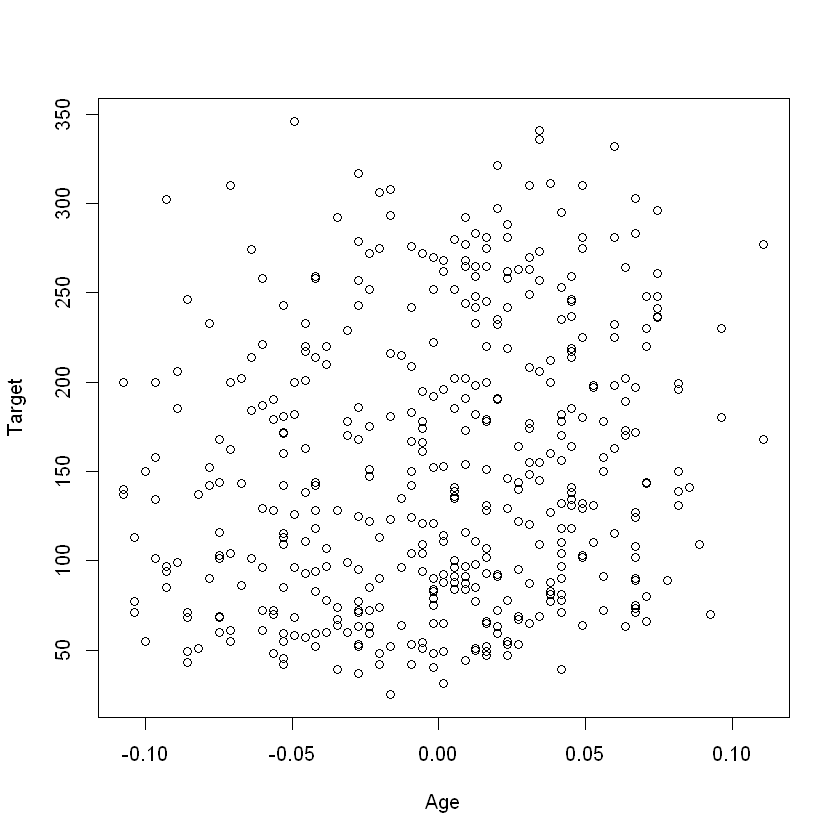

In [7]:
plot(Target ~ Age, diabetes)

This doesn't tell us much. It looks like there isn't a large dependence on age - othewise we would have seen something more specific than a large blob of data. Let's try other inputs. We'll plot a bunch of them in a row.

_**Jupyter Hint: Clicking in the white space next to the output cell will expand and contract the output contents. This is helpful when you have lots of output. **_

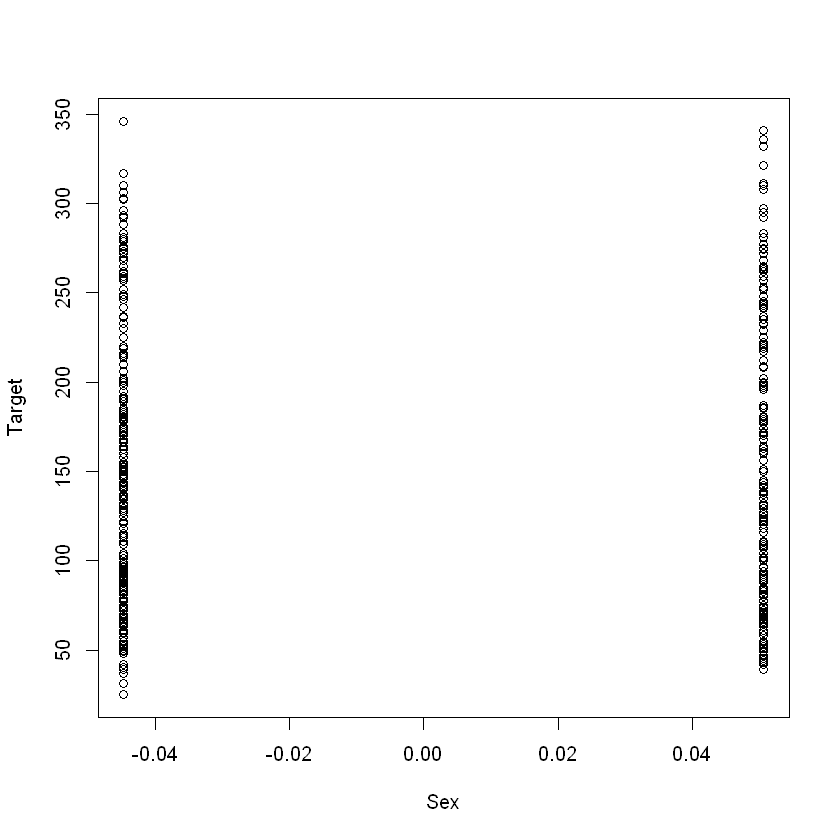

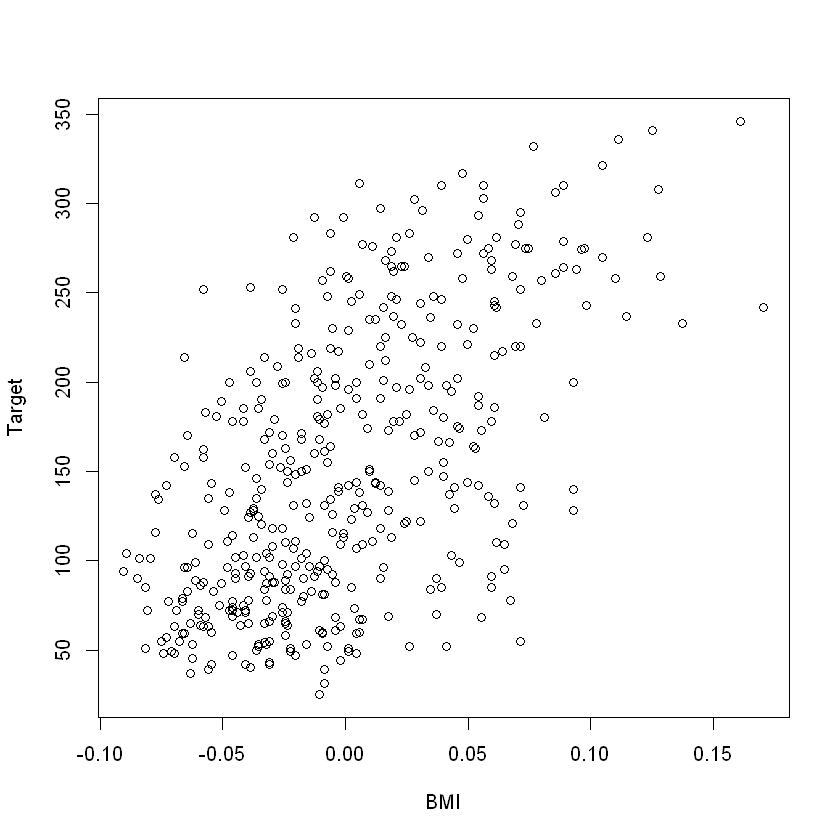

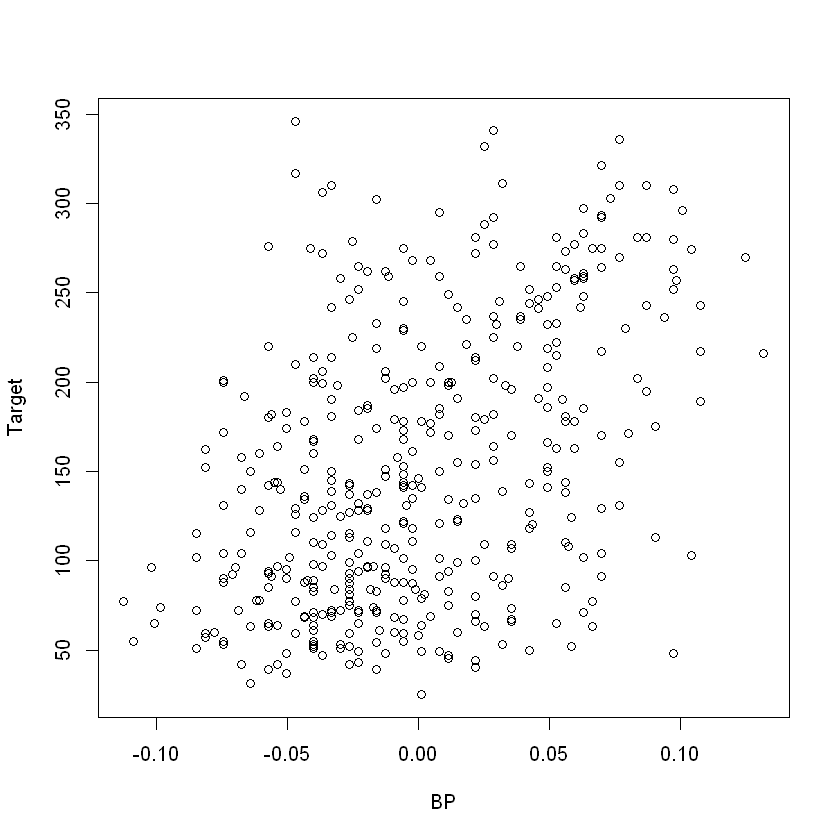

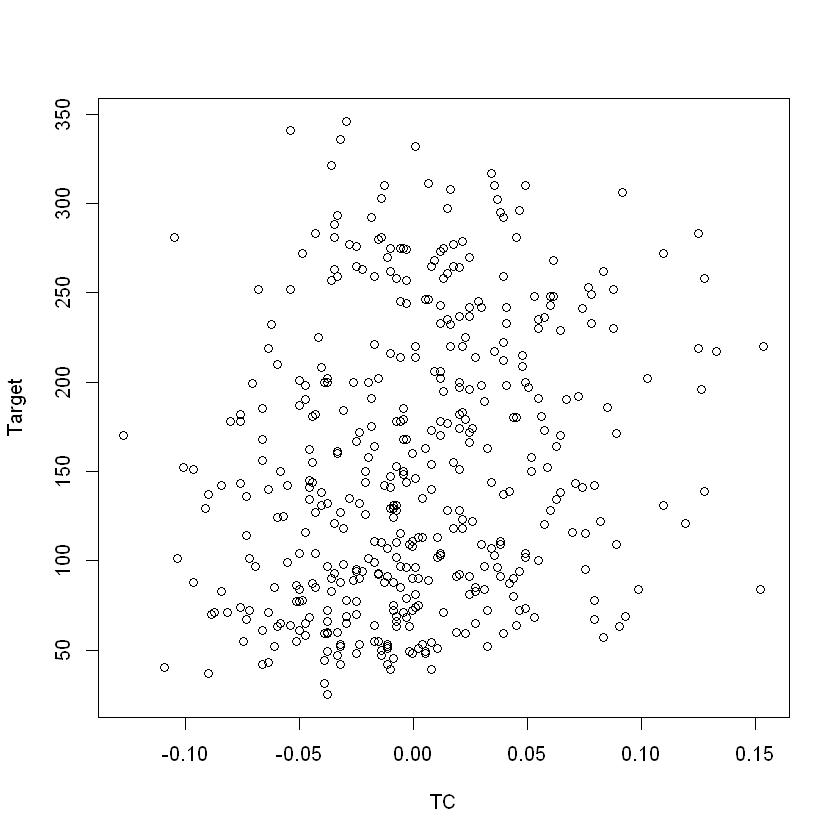

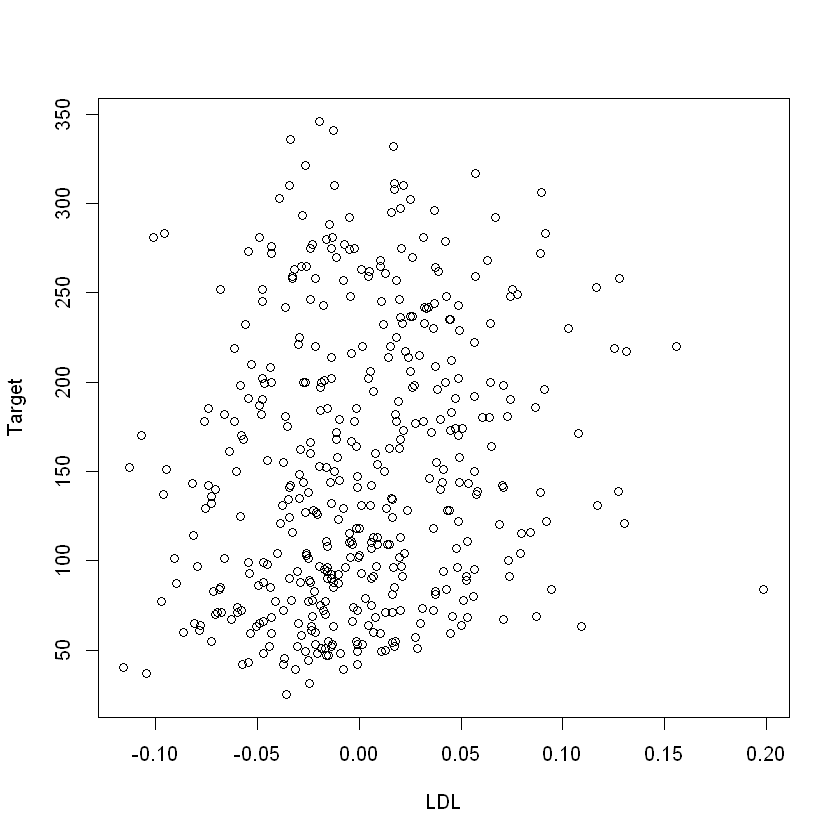

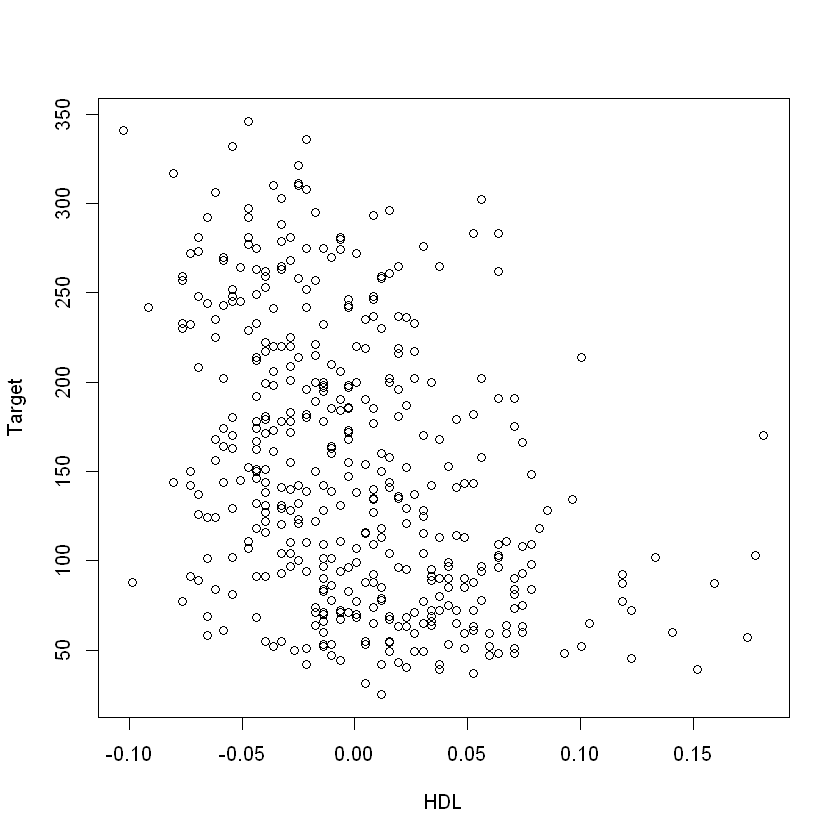

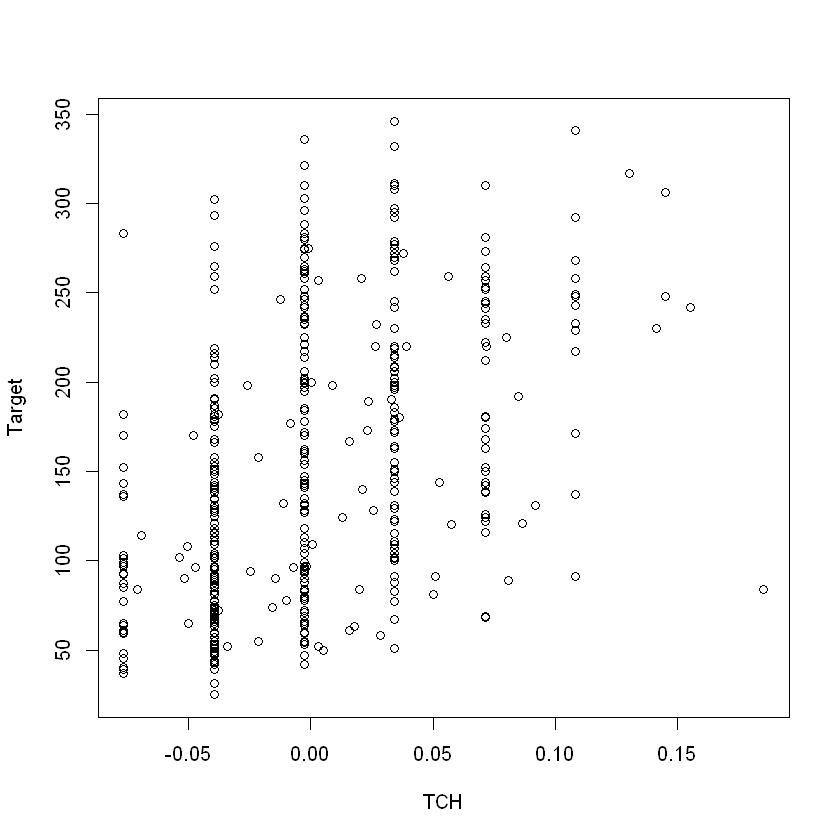

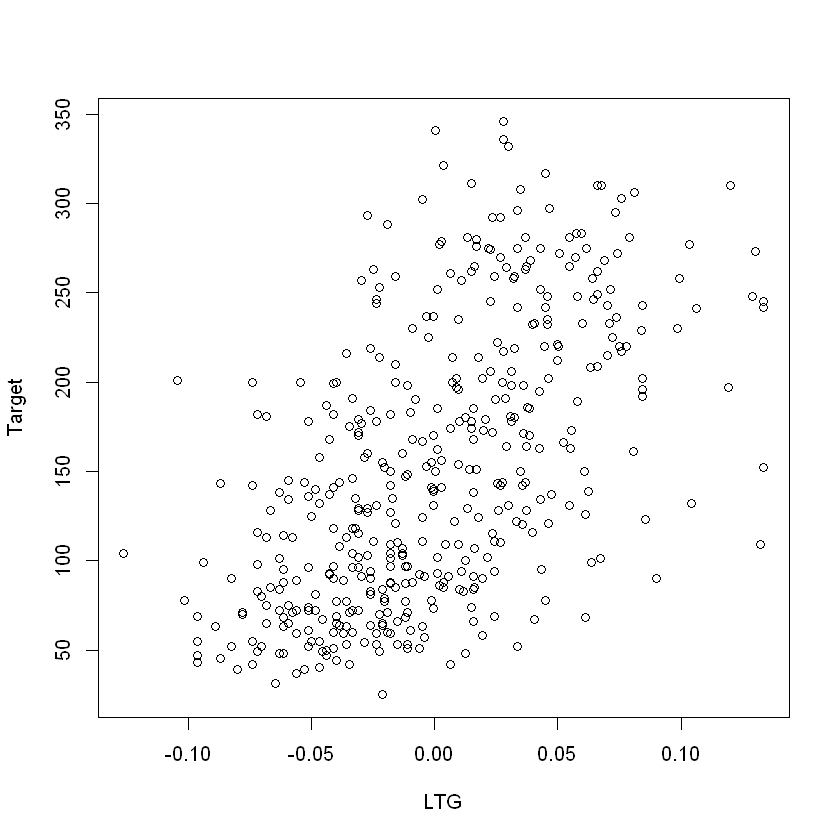

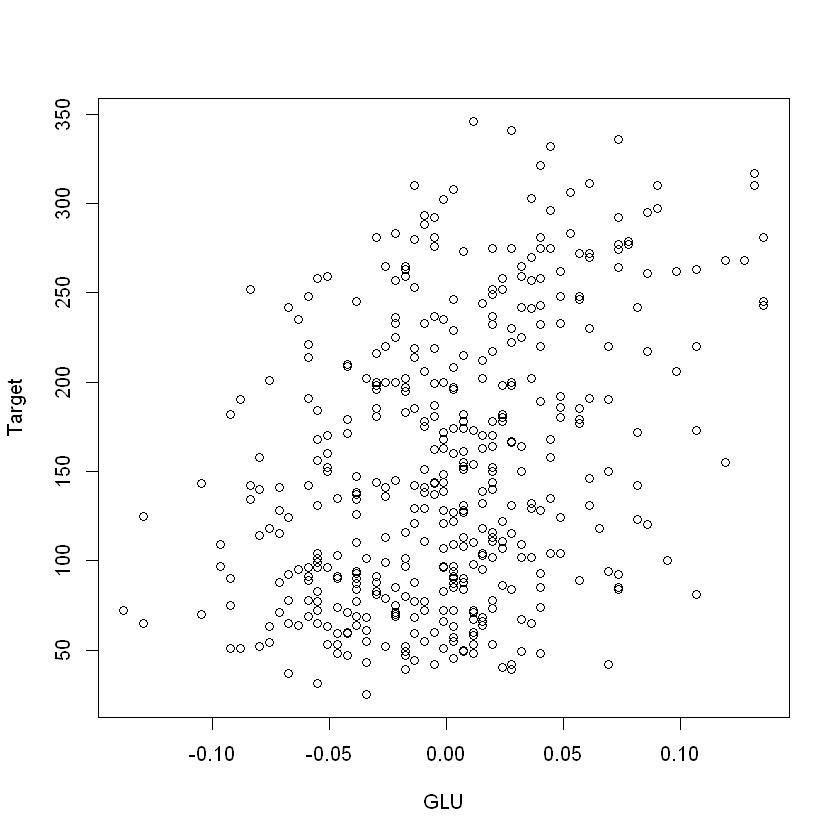

In [8]:
plot(Target ~ Sex, diabetes)
plot(Target ~ BMI, diabetes)
plot(Target ~ BP, diabetes)
plot(Target ~ TC, diabetes)
plot(Target ~ LDL, diabetes)
plot(Target ~ HDL, diabetes)
plot(Target ~ TCH, diabetes)
plot(Target ~ LTG, diabetes)
plot(Target ~ GLU, diabetes)

It looks like there are some of these, like BMI, that as the BMI goes up, so does the Target.

# Import Classification Data

There is another type of data set where we have any number of input variables, but the output is no longer a continuous number, but rather it is a _class_. By that we mean that it is one of a finite number of possibilities. For example, in this next data set, we are looking at the characteristics of three different iris flowers. The measurements apply to one of the three types:
* Setosa
* Versicolour
* Virginica

Let's take a look at this data set and see what it takes to visualize it. First load the data in and inspect the first few rows.

In [9]:
irisDF <- read.csv('Class01_iris_data.csv')

head(irisDF)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,target
5.0,2.3,3.3,1.0,Versicolour
5.7,2.9,4.2,1.3,Versicolour
4.7,3.2,1.6,0.2,Setosa
7.7,3.0,6.1,2.3,Virginica
5.5,2.5,4.0,1.3,Versicolour
5.6,2.9,3.6,1.3,Versicolour


As you can see, the 'target' column is no longer numerical, but a text entry that is one of the three possible iris varieties. We also see that the default column headings are a bit long and will get tiring to type out when we want to reference them. They also have a bunch of periods in them - the default settings for `read.csv` converts column names to a string that doesn't have spaces or special characters in it. Let's rename the columns instead so we can use them more easily.

To do this, we create a new `vector` in R using the `c()` command. This `c`*ombines* the entries together. We assign this new vector to the names of the data frame by first getting the names using the `names()` function, then using the assignment operator `<-` to assign the names. This is a little different syntax than most programming languages, in that you can assign to a function, but think of it as "get the names of the data frame, then assign them new names".

In [11]:
names(irisDF) <- c('sepalLen','sepalWid','petalLen','petalWid','target')

head(irisDF)

sepalLen,sepalWid,petalLen,petalWid,target
5.0,2.3,3.3,1.0,Versicolour
5.7,2.9,4.2,1.3,Versicolour
4.7,3.2,1.6,0.2,Setosa
7.7,3.0,6.1,2.3,Virginica
5.5,2.5,4.0,1.3,Versicolour
5.6,2.9,3.6,1.3,Versicolour


Now we want to visualize the data. We don't know what to expect, so let's just pick a couple of variables and see what the data look like.

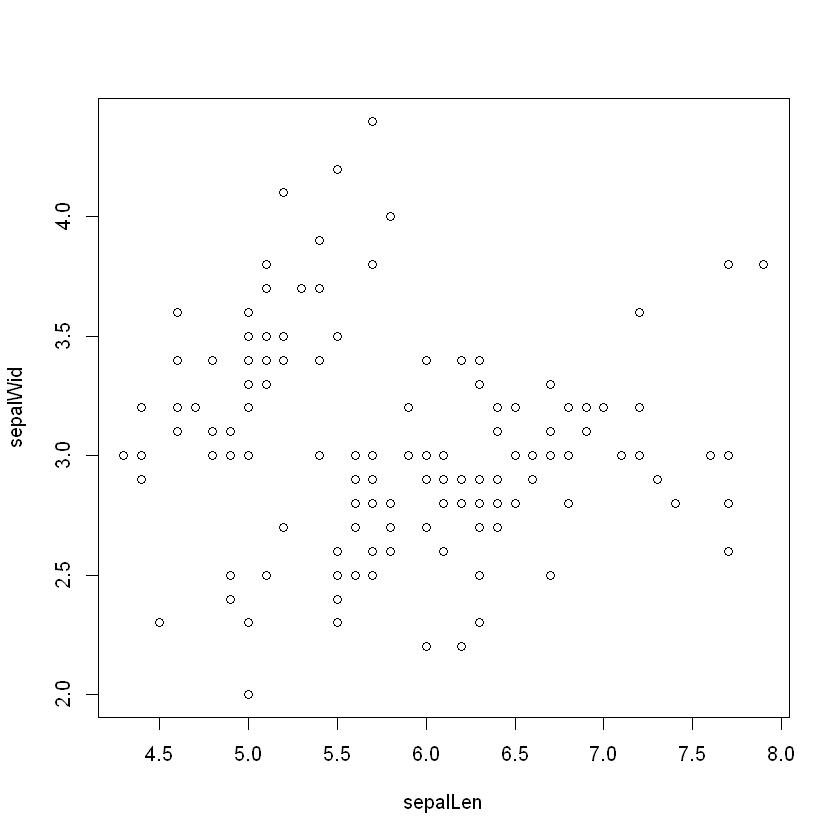

In [12]:
plot(sepalWid ~ sepalLen, irisDF)

So we see that there are entries at a number of different points, but it would be really nice to be able to identify which point correpsonds to which variety. We can do this in a single step.

The `pairs()` command picks all pairs of variables and plots them against each other. We tell it what data to use: `irisDF` and we are going to tell it to color the data based on the target variable. This requires that we get the target column. In `R` we do this using the `$` syntax:
> `dataframe$columnname`

We implement this by using `irisDF$target`.

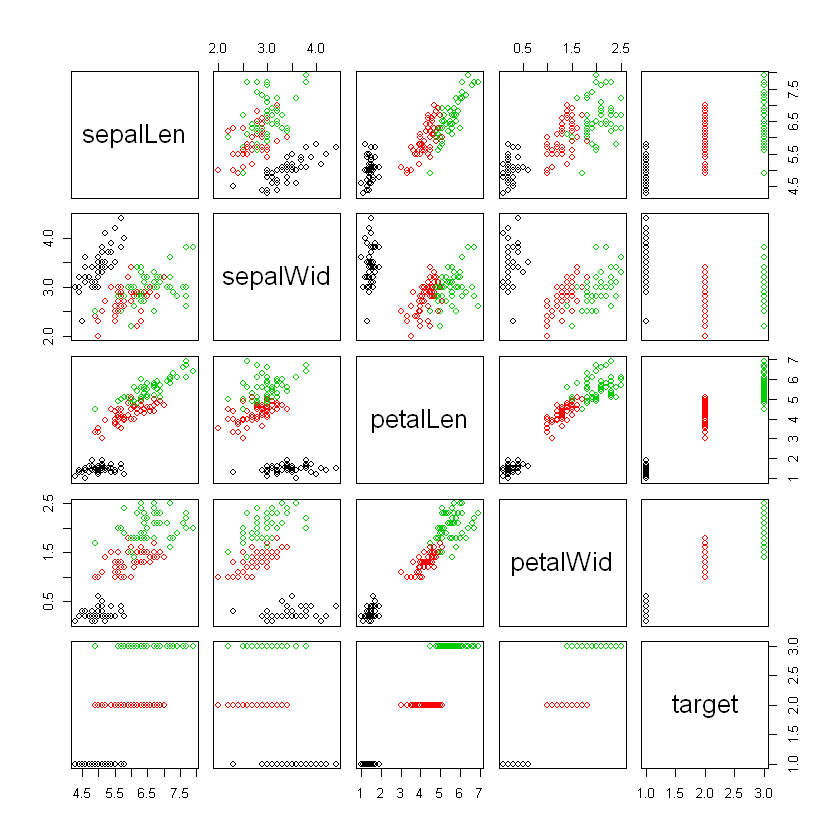

In [15]:
pairs(irisDF, col=irisDF$target)

We see that there are some of these plots that show there might be a way to distinuish the three different varieties. We'll look at how to do that later on, but this gives us a start.

# Import Image Data

The last type of data we are going to look at are image data. This type of data provides information about each pixel (or element) in an image. We'll start by working with gray-scale images where each pixel could be a value anywhere between 0 (black) and 255 (white). We'll read in the data then look at how to create the image. This data set are handwritten digits from 0 to 9 that have been digitized. We will eventually try to teach the computer to read the handwritten digits.

In [16]:
digitDF <- read.csv('Class01_digits_data.csv')

head(digitDF)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,target
0,0,7,12,12,2,0,0,0,5,...,0,0,0,11,12,13,14,11,0,2
0,0,0,10,15,3,0,0,0,0,...,2,0,0,1,9,15,16,11,0,6
0,0,7,13,3,0,0,0,0,0,...,3,0,0,6,15,6,9,9,1,2
0,0,11,16,9,8,0,0,0,0,...,0,0,0,13,14,8,0,0,0,8
0,0,0,3,16,3,0,0,0,0,...,0,0,0,0,4,14,0,0,0,4
0,0,12,13,12,12,12,0,0,0,...,0,0,0,10,14,12,0,0,0,5


In [54]:
print(digitDF[1,])

  X0 X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21
1  0  0  7 12 12  2  0  0  0  5  15   6  10   9   0   0   0  11   4   0  11   6
  X22 X23 X24 X25 X26 X27 X28 X29 X30 X31 X32 X33 X34 X35 X36 X37 X38 X39 X40
1   0   0   0   3   0   2  15   2   0   0   0   0   1  13   6   0   0   0   0
  X41 X42 X43 X44 X45 X46 X47 X48 X49 X50 X51 X52 X53 X54 X55 X56 X57 X58 X59
1   0  11  11   1   0   0   0   0   1  16   7   4   4   2   0   0   0  11  12
  X60 X61 X62 X63 target
1  13  14  11   0      2


This data set has 65 columns. The first 64 correspond to the grayscale value for each of the pixels in an 8 by 8 image. The last column (the 'target') indicates what digit the image is supposed to be. We'll pick one row to start with (row 41 in this case). We'll use some in-line commenting to explain each step here.

[1] "Expected Digit: 4"


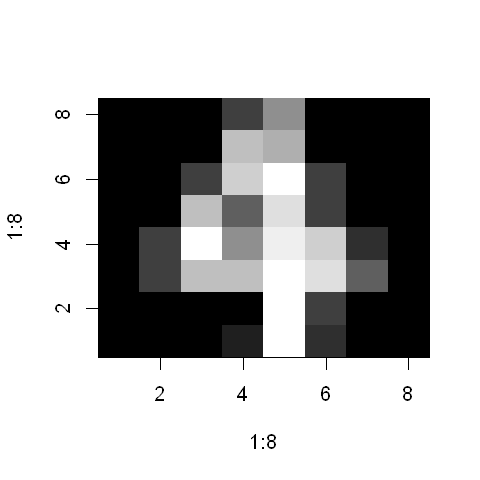

In [87]:
testnum <- 41
#
# First, get the first 64 columns which correspond to the image data and assign them to a matrix
#
testimage <- matrix(as.numeric(digitDF[testnum,1:64]), nrow=8)


#
# We need to flip the image both horizontally and vertically or else it plots upside down and backwards
#
testimage <- t(apply(testimage, 1, rev))


#
# We'll print out what the image is supposed to be. We use paste to join the string and the number
# 
print(paste('Expected Digit:', digitDF[testnum,65]))

#
# We tell R to plot a gray scale image
#
options(repr.plot.width=4, repr.plot.height=4)
image(1:8, 1:8, testimage, col=gray((0:255)/255))

# Practice

There is one more data set for you to practice on. It has the filename `Class01_breastcancer_data.csv`. This data set comes from a study of breast cancer in Wisconsin. You can read more about the data set on page 6 (search `BreastCancer`) of this file: https://cran.r-project.org/web/packages/mlbench/mlbench.pdf Go ahead and load the data, investigate what is there and plot the data to see what we have.



# Assignment

Your assignment is to get your own data set loaded and plotted in your own notebook. This data exploration is the first step to doing machine learning. You will need to get at least 2 different data sets: one that will use a regression and one that is a classification set. We'll use them in future classes to explore different machine learning algorithms.

## Working with SageMath Assignments

You have a copy of this file in your Assignments Folder. You should create a copy of this file and not modify it further. That way you won't accidentally erase any of the notes. Rename your file:
> `Class01_to_grade.ipynb`

That way I will know what file to look at when I grade the assignments.